# **LAB 4 - PART 2 Multi Layers Perceptron**

<font color="Orange">**NOTE**</font> : In this lab, you will need to use PyTorch. Please refer to the PyTorch documentation for installation instructions: https://pytorch.org.


In [121]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

Create Sine dataset with 9 sampling point as a activity sheet.<br>
Then, plot the dataset.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

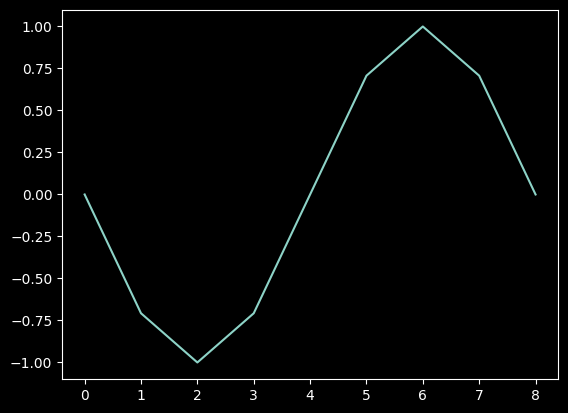


</details>

In [122]:
angles = np.linspace(-np.pi, np.pi, 9)
sines = np.sin(angles)
dataset = [[angle, sine] for angle, sine in zip(angles, sines)]
dataset

[[-3.141592653589793, -1.2246467991473532e-16],
 [-2.356194490192345, -0.7071067811865476],
 [-1.5707963267948966, -1.0],
 [-0.7853981633974483, -0.7071067811865476],
 [0.0, 0.0],
 [0.7853981633974483, 0.7071067811865476],
 [1.5707963267948966, 1.0],
 [2.356194490192345, 0.7071067811865476],
 [3.141592653589793, 1.2246467991473532e-16]]

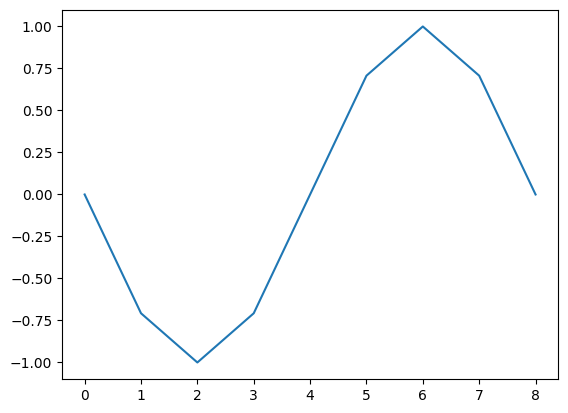

In [123]:
### START CODE HERE ###
plt.plot(sines)
### END CODE HERE ###

**Define the Multi Layers Perceptron class using pytorch.**<br>
Using `nn.Linear()` and `nn.ReLU()`

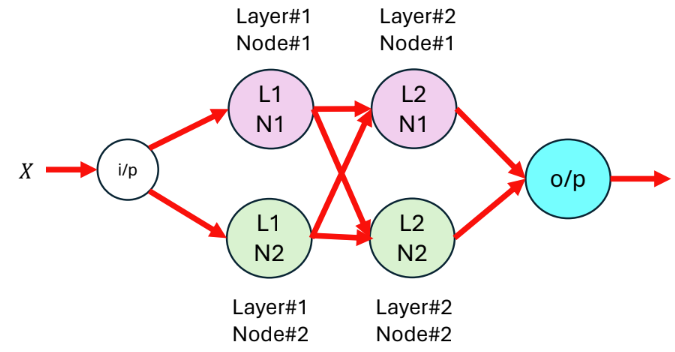

In [124]:
### START CODE HERE ###
class MLP(nn.Module):
    def __init__(self, input_size=1, hidden_size=2, output_size=1):
        """
        Multi-Layer Perceptron (MLP) class.

        Args:
            input_size (int): The size of the input layer.
            hidden_size (int): The size of the hidden layer.
            output_size (int): The size of the output layer.
        """
        super(MLP, self).__init__()
        
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        """
        Forward pass of the MLP.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            in_fc1: This represents the input to the first fully connected layer (fc1). It is obtained by passing the input tensor x through the fc1 layer.

            fc1_x: This represents the output of the first fully connected layer (fc1) after applying the ReLU activation function. It is obtained by passing in_fc1 through the ReLU activation function.

            in_fc2: This represents the input to the second fully connected layer (fc2). It is obtained by passing fc1_x through the fc2 layer.

            fc2_x: This represents the output of the second fully connected layer (fc2) after applying the ReLU activation function. It is obtained by passing in_fc2 through the ReLU activation function.

            out: This represents the final output of the MLP model. It is obtained by passing fc2_x through the third fully connected layer (fc3).
        """
        in_fc1 = self.fc1(x)
        fc1_x = self.relu(in_fc1)
        in_fc2 = self.fc2(fc1_x)
        fc2_x = self.relu(in_fc2)
        out = self.fc3(fc2_x)
        return in_fc1, fc1_x, in_fc2, fc2_x, out

mlp = MLP()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(mlp.parameters(), lr=0.008)
print(mlp)
### END CODE HERE ###

MLP(
  (fc1): Linear(in_features=1, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=2, bias=True)
  (fc3): Linear(in_features=2, out_features=1, bias=True)
  (relu): ReLU()
)


**Load the initial model's weights that given in Lab Direction sheet.**<br>
please refer to this https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [125]:
### START CODE HERE ###
model_sate_dict = OrderedDict()
model_sate_dict['fc1.weight'] = torch.tensor([[0.9590], [-0.6742]])
model_sate_dict['fc1.bias'] = torch.tensor([-0.3777, 0.0178])

model_sate_dict['fc2.weight'] = torch.tensor([[-0.3664, 0.3738], [0.5779, 0.1787]])
model_sate_dict['fc2.bias'] = torch.tensor([-0.3471, 0.1519])

model_sate_dict['fc3.weight'] = torch.tensor([[0.5198, -0.0354]])
model_sate_dict['fc3.bias'] = torch.tensor([0.4454])

mlp.load_state_dict(model_sate_dict)
### END CODE HERE ###

<All keys matched successfully>

**Try to plot the output from each layers of weight loaded MLP**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

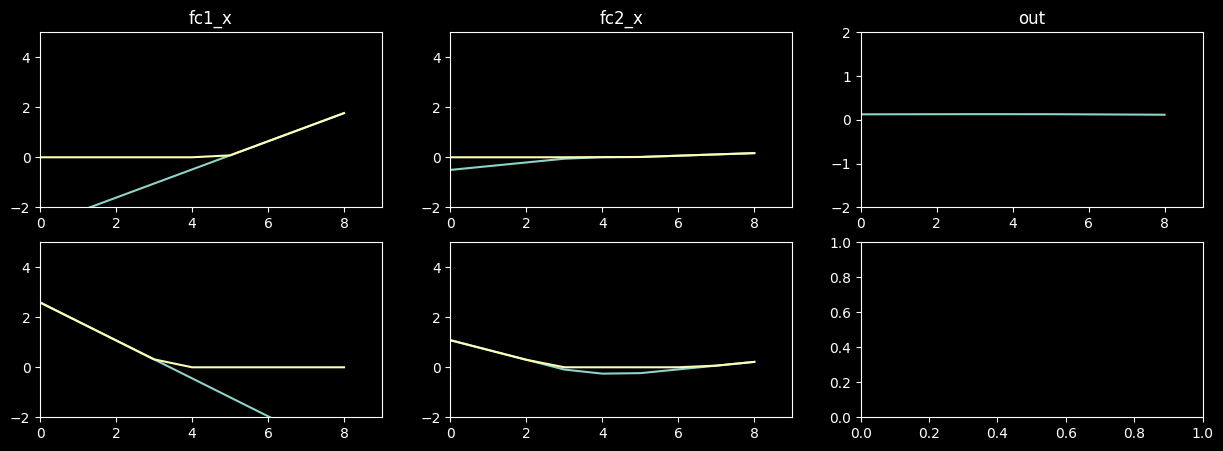


</details>

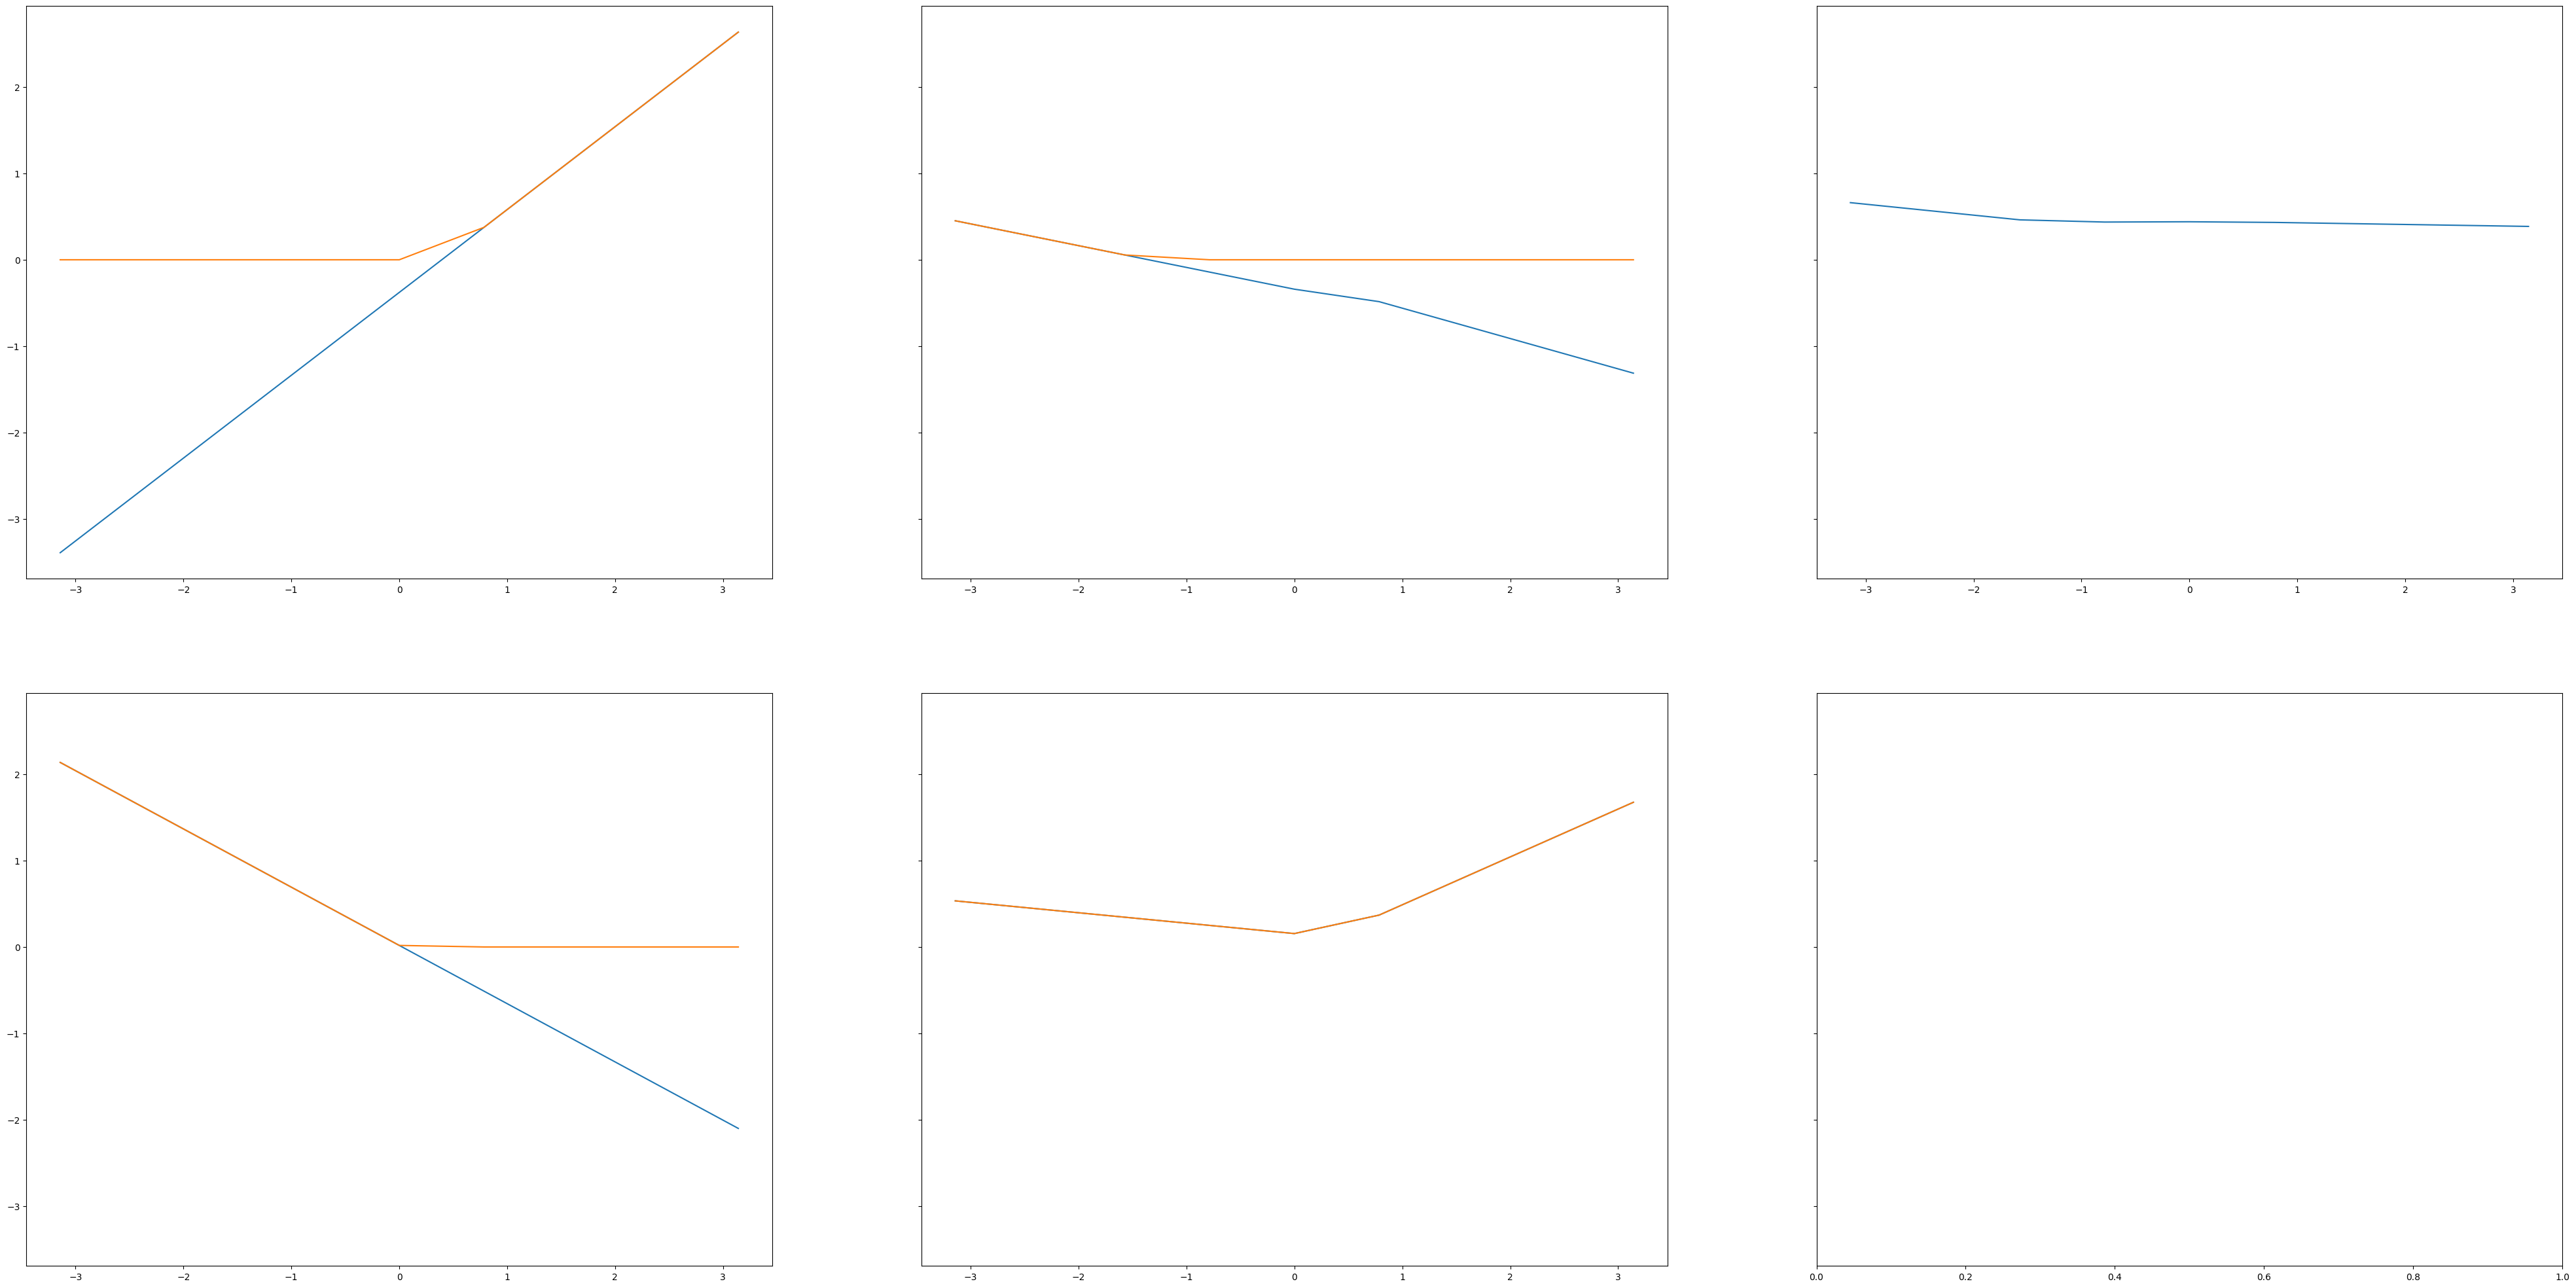

In [129]:
output_dict = {
    'in_fc1': [],
    'fc1_x': [],
    'in_fc2': [],
    'fc2_x': [],
    'out': []
}
### START CODE HERE ###
dataset_tensor = torch.tensor(dataset).float()
in_fc1, fc1_x, in_fc2, fc2_x, out = mlp(dataset_tensor[:, 0].unsqueeze(1))
output_dict['in_fc1'].append(in_fc1.detach().numpy())
output_dict['fc1_x'].append(fc1_x.detach().numpy())
output_dict['in_fc2'].append(in_fc2.detach().numpy())
output_dict['fc2_x'].append(fc2_x.detach().numpy())
output_dict['out'].append(out.detach().numpy())

# plot
fig, axs = plt.subplots(2, 3, sharey=True, figsize=(50, 25))
# layer1 node1
axs[0][0].plot(angles, output_dict['in_fc1'][0][:, 0], label='in_fc1')
axs[0][0].plot(angles, output_dict['fc1_x'][0][:, 0], label='fc1_x')

# layer1 node2
axs[1][0].plot(angles, output_dict['in_fc1'][0][:, 1], label='in_fc1')
axs[1][0].plot(angles, output_dict['fc1_x'][0][:, 1], label='fc1_x')

# #layer2 node1
axs[0][1].plot(angles, output_dict['in_fc2'][0][:, 0], label='in_fc2')
axs[0][1].plot(angles, output_dict['fc2_x'][0][:, 0], label='fc2_x')

#layer2 node2
axs[1][1].plot(angles, output_dict['in_fc2'][0][:, 1], label='in_fc2')
axs[1][1].plot(angles, output_dict['fc2_x'][0][:, 1], label='fc2_x')

# output layer
axs[0][2].plot(angles, output_dict['out'][0], label='in_fc2')

### END CODE HERE ###

In [127]:
print(output_dict['fc2_x'][0])

[[0.4512852  0.5335785 ]
 [0.25335225 0.43895406]
 [0.05541939 0.34432966]
 [0.         0.24970526]
 [0.         0.15508085]
 [0.         0.3688996 ]
 [0.         0.8041721 ]
 [0.         1.2394445 ]
 [0.         1.674717  ]]


**Train the MLP for n Epochs.**<br>
In the final part, you will need to save a GIF that animates how the output of each layer (similar to cell above) changes during the training loops.

In [134]:
output_dict = {
    'in_fc1': [],
    'fc1_x': [],
    'in_fc2': [],
    'fc2_x': [],
    'out': []
}
### START CODE HERE ###
num_epochs = 50
log_interval = 1
frame = []

for epoch in range(num_epochs):

    in_fc1, fc1_x, in_fc2, fc2_x, out = mlp(dataset_tensor[:, 0].unsqueeze(1))

    output_dict['in_fc1'].append(in_fc1.detach().numpy())
    output_dict['fc1_x'].append(fc1_x.detach().numpy())
    output_dict['in_fc2'].append(in_fc2.detach().numpy())
    output_dict['fc2_x'].append(fc2_x.detach().numpy())
    output_dict['out'].append(out.detach().numpy())

    loss = criterion(out, dataset_tensor[:, 1].unsqueeze(1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % log_interval == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}")
        frame.append(output_dict)

### END CODE HERE ###

Epoch [1/50], Loss: 0.4932018518447876
Epoch [2/50], Loss: 0.49216699600219727
Epoch [3/50], Loss: 0.4911603331565857
Epoch [4/50], Loss: 0.4901808500289917
Epoch [5/50], Loss: 0.4892273545265198
Epoch [6/50], Loss: 0.4882988929748535
Epoch [7/50], Loss: 0.48739439249038696
Epoch [8/50], Loss: 0.4865129888057709
Epoch [9/50], Loss: 0.4856538772583008
Epoch [10/50], Loss: 0.48481619358062744
Epoch [11/50], Loss: 0.4839990437030792
Epoch [12/50], Loss: 0.4832017719745636
Epoch [13/50], Loss: 0.4824235737323761
Epoch [14/50], Loss: 0.48166370391845703
Epoch [15/50], Loss: 0.48092159628868103
Epoch [16/50], Loss: 0.4801965355873108
Epoch [17/50], Loss: 0.4794877767562866
Epoch [18/50], Loss: 0.47879505157470703
Epoch [19/50], Loss: 0.47811758518218994
Epoch [20/50], Loss: 0.47745481133461
Epoch [21/50], Loss: 0.47680631279945374
Epoch [22/50], Loss: 0.4761715531349182
Epoch [23/50], Loss: 0.4755500555038452
Epoch [24/50], Loss: 0.4749413728713989
Epoch [25/50], Loss: 0.47434505820274353
Ep

**Plot the final output compare to the original dataset.**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

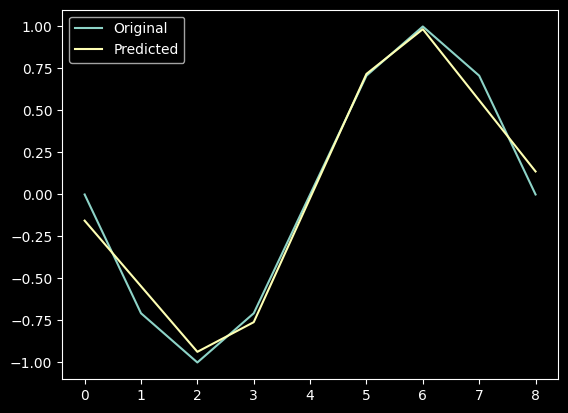


</details>

In [153]:
frame[-1]['out']

[array([[0.23370644],
        [0.1798245 ],
        [0.18729223],
        [0.19475996],
        [0.20222771],
        [0.1867903 ],
        [0.15512076],
        [0.12345123],
        [0.09178169]], dtype=float32),
 array([[0.2305102 ],
        [0.17714217],
        [0.18459466],
        [0.19204715],
        [0.19949964],
        [0.18414766],
        [0.15263267],
        [0.1211177 ],
        [0.08960271]], dtype=float32),
 array([[0.2273776 ],
        [0.17451298],
        [0.18194783],
        [0.18938269],
        [0.19681755],
        [0.18155521],
        [0.15020359],
        [0.11885197],
        [0.08750035]], dtype=float32),
 array([[0.22430728],
        [0.17193577],
        [0.17935066],
        [0.18676557],
        [0.19418046],
        [0.17901182],
        [0.14783208],
        [0.11665232],
        [0.08547258]], dtype=float32),
 array([[0.22129788],
        [0.16940938],
        [0.17680204],
        [0.1841947 ],
        [0.19158737],
        [0.17651631],
        

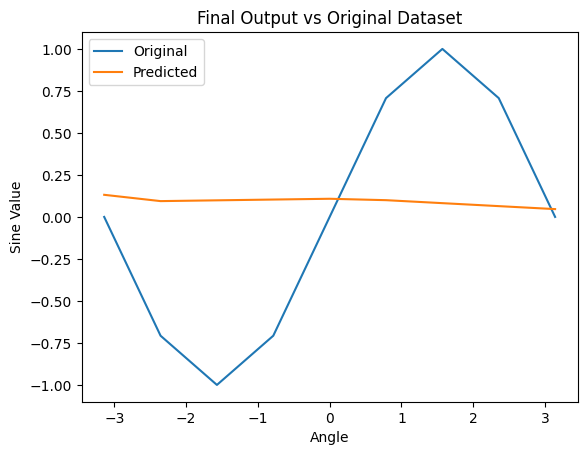

In [150]:
### START CODE HERE ###
plt.plot(dataset_tensor[:, 0], dataset_tensor[:, 1], label='Original')
plt.plot(dataset_tensor[:, 0], frame[-1]['out'][-1], label='Predicted')
plt.legend()
plt.xlabel('Angle')
plt.ylabel('Sine Value')
plt.title('Final Output vs Original Dataset')
plt.show()

### END CODE HERE ###

**Save a GIF that animates how the output of each layer changes during the training loops**

In [191]:
for f in frame:
    print(f)
    print('-----------------------------------------------------------------')

{'in_fc1': [array([[-3.3733735e+00,  1.9803493e+00],
       [-2.6257110e+00,  1.4856045e+00],
       [-1.8780487e+00,  9.9085975e-01],
       [-1.1303864e+00,  4.9611491e-01],
       [-3.8272396e-01,  1.3701135e-03],
       [ 3.6493841e-01, -4.9337471e-01],
       [ 1.1126008e+00, -9.8811948e-01],
       [ 1.8602630e+00, -1.4828644e+00],
       [ 2.6079254e+00, -1.9776092e+00]], dtype=float32), array([[-3.3728454e+00,  1.9802855e+00],
       [-2.6253500e+00,  1.4855654e+00],
       [-1.8778546e+00,  9.9084550e-01],
       [-1.1303592e+00,  4.9612552e-01],
       [-3.8286379e-01,  1.4055055e-03],
       [ 3.6463162e-01, -4.9331450e-01],
       [ 1.1121271e+00, -9.8803455e-01],
       [ 1.8596225e+00, -1.4827545e+00],
       [ 2.6071179e+00, -1.9774746e+00]], dtype=float32), array([[-3.3723164e+00,  1.9802276e+00],
       [-2.6249881e+00,  1.4855310e+00],
       [-1.8776600e+00,  9.9083436e-01],
       [-1.1303319e+00,  4.9613780e-01],
       [-3.8300371e-01,  1.4411983e-03],
       [ 3.

[[<matplotlib.lines.Line2D object at 0x000002005F3F9EB0>, <matplotlib.lines.Line2D object at 0x000002005F3F8470>, <matplotlib.lines.Line2D object at 0x000002005C62DA00>, <matplotlib.lines.Line2D object at 0x000002005C62E210>, <matplotlib.lines.Line2D object at 0x000002005C62F4A0>, <matplotlib.lines.Line2D object at 0x000002005C62DF40>, <matplotlib.lines.Line2D object at 0x000002005C62EBA0>, <matplotlib.lines.Line2D object at 0x000002005C62EC00>, <matplotlib.lines.Line2D object at 0x000002005C62E8A0>], [<matplotlib.lines.Line2D object at 0x000002005C62D940>, <matplotlib.lines.Line2D object at 0x000002005C62FFE0>, <matplotlib.lines.Line2D object at 0x000002005C62F530>, <matplotlib.lines.Line2D object at 0x000002005C62FE30>, <matplotlib.lines.Line2D object at 0x000002005C62E4B0>, <matplotlib.lines.Line2D object at 0x000002005C62F9B0>, <matplotlib.lines.Line2D object at 0x000002005C62F770>, <matplotlib.lines.Line2D object at 0x000002005C62FC50>, <matplotlib.lines.Line2D object at 0x0000020

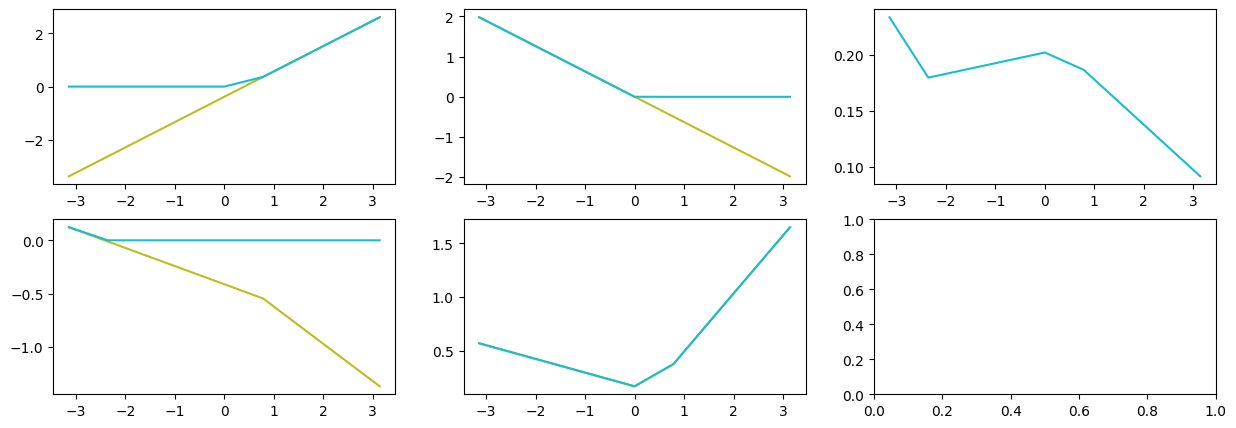

In [188]:
### START CODE HERE ###
from IPython.display import HTML
import matplotlib.animation as animation
fig, axs = plt.subplots(2, 3, figsize=(15, 5))
ims = []

for f in frame:
    im = []
    im.append(axs[0][0].plot(angles, f['in_fc1'][0][:, 0], label='in_fc1')[0])
    im.append(axs[0][0].plot(angles, f['fc1_x'][0][:, 0], label='fc1_x')[0])
    im.append(axs[0][1].plot(angles, f['in_fc1'][0][:, 1], label='in_fc1')[0])
    im.append(axs[0][1].plot(angles, f['fc1_x'][0][:, 1], label='fc1_x')[0])
    im.append(axs[1][0].plot(angles, f['in_fc2'][0][:, 0], label='in_fc2')[0])
    im.append(axs[1][0].plot(angles, f['fc2_x'][0][:, 0], label='fc2_x')[0])
    im.append(axs[1][1].plot(angles, f['in_fc2'][0][:, 1], label='in_fc2')[0])
    im.append(axs[1][1].plot(angles, f['fc2_x'][0][:, 1], label='fc2_x')[0])
    im.append(axs[0][2].plot(angles, f['out'][0], label='in_fc2')[0])

    ims.append(im)
print(ims)
ani = animation.ArtistAnimation(fig, ims, interval=300, blit=True)
ani_js = ani.to_jshtml()

HTML(ani_js)

### END CODE HERE ###

### Question
1. Calculate and describe a comparison of Mean Square Error (MSE) values between y_predict and y_real.
2. From the Node_result graphs, identify if there is any Node that changes the sign of the weight (slope) from the initial starting weight.
3. Does increasing the number of epochs to 80,000 or increasing/decreasing the learning_rate help reduce the MSE?
4. If the initial weights are changed as specified below, do they affect the number of training epoches and the final results (y_predict)? If there is an impact, Explain.
    model_sate_dict['fc1.weight'] -> [[0.1], [0.1]]
    model_sate_dict['fc1.bias'] -> [-0.1, 0.9]
    model_sate_dict['fc2.weight'] -> [[0.51, -0.1], [-0.5, 0.5]]
    model_sate_dict['fc2.bias'] -> [-0.45,0.1]
    model_sate_dict['fc3.weight'] -> [[-1.5, -0.8]]
    model_sate_dict['fc3.bias'] -> [0.5]